In [ ]:
######from google.colab import files
#uploaded=files.upload()

In [ ]:
###  CART algorithm

In [ ]:
import numpy as np
import pandas as pd

#define dataset
age=['old','old','old','mid','mid','mid','mid','new','new','new']
Type=['software','software','hardware','software','hardware','hardware','software','software','hardware','software']
competition=['yes','no','no','yes','yes','no','no','yes','no','no']
profit=['0','0','0','0','0','1','1','1','1','1']

In [ ]:
#creating datafram
dataset={'age':age,'Type':Type,'competition':competition,'profit':profit}
df=pd.DataFrame(dataset,columns=['age','Type','competition','profit'])
df

,age,Type,competition,profit
0,old,software,yes,0
1,old,software,no,0
2,old,hardware,no,0
3,mid,software,yes,0
4,mid,hardware,yes,0
5,mid,hardware,no,1
6,mid,software,no,1
7,new,software,yes,1
8,new,hardware,no,1
9,new,software,no,1


In [ ]:
from sklearn import preprocessing
lableEnc=preprocessing.LabelEncoder()
df['age']=lableEnc.fit_transform(df['age'])
df['Type']=lableEnc.fit_transform(df['Type'])
df['competition']=lableEnc.fit_transform(df['competition'])
df

,age,Type,competition,profit
0,2,1,1,0
1,2,1,0,0
2,2,0,0,0
3,0,1,1,0
4,0,0,1,0
5,0,0,0,1
6,0,1,0,1
7,1,1,1,1
8,1,0,0,1
9,1,1,0,1


In [ ]:
#setting dependent 
X=df.iloc[: , 0:3]
Y=df.loc[: , 'profit']
Y

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: profit, dtype: object

In [ ]:
#training and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
#X_train.shape
#X_test.shape
#Y_train.shape
#Y_test.shape

In [ ]:
#training the model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=2)
model.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import tree
#calculating accuracy of the model
Predt=model.predict(X_test)

#calculate accuracy
print(round(accuracy_score(Y_test, Predt)*100,2))

66.67


[Text(200.88000000000002, 181.2, 'X[0] <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

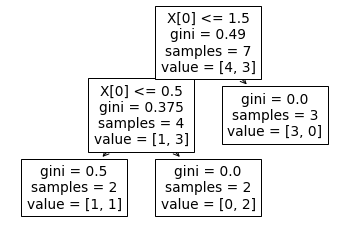

In [ ]:
tree.plot_tree(model)
